In [187]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

In [188]:
df = pd.read_csv('horse.csv')

In [189]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [191]:
df.shape

(299, 28)

In [192]:
df.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [193]:
df['surgery'] = df['surgery'].map({'yes':1,'no':2}).astype('float64')
df['age'] = df['age'].map({'adult':1,'young':2}).astype('float64')
df['temp_of_extremities'] = df['temp_of_extremities'].map({'normal':1,'warm':2,'cool':3,'cold':4}).astype('float64')
df['peripheral_pulse'] = df['peripheral_pulse'].map({'increased':2,'normal':1,'reduced':3,'absent':4}).astype('float64')
df['mucous_membrane'] = df['mucous_membrane'].map({'dark_cyanotic':6,'bright_red':5,'pale_cyanotic':4,'pale_pink':3,'bright_pink':2,'normal_pink':1}).astype('float64')
df['capillary_refill_time'] = df['capillary_refill_time'].map({'more_3_sec':3, '3':2, 'less_3_sec':1}).astype('float64')
df['pain'] = df['pain'].map({'extreme_pain':5, 'severe_pain':4, 'mild_pain':3, 'depressed':2, 'alert':1}).astype('float64')
df['peristalsis'] = df['peristalsis'].map({'absent':4, 'hypomotile':3, 'normal':2, 'hypermotile':1}).astype('float64')
df['abdominal_distention'] = df['abdominal_distention'].map({'severe':4,'moderate':3,'slight':2,'none':1}).astype('float64')
df['nasogastric_tube'] = df['nasogastric_tube'].map({'significant':3, 'slight':2, 'none':1}).astype('float64')
df['nasogastric_reflux'] = df['nasogastric_reflux'].map({'more_1_liter':3, 'less_1_liter':2, 'none':0}).astype('float64')
df['rectal_exam_feces'] = df['rectal_exam_feces'].map({'absent':4, 'decreased':3, 'increased':2, 'normal':1}).astype('float64')
df['abdomen'] = df['abdomen'].map({'distend_large':5, 'distend_small':4, 'firm':3, 'other':2, 'normal':1}).astype('float64')
df['abdomo_appearance'] = df['abdomo_appearance'].map({'serosanguious':3, 'cloudy':2, 'clear':1}).astype('float64')
df['outcome'] = df['outcome'].map({'euthanized':1, 'died':0, 'lived':2}).astype('float64')
df['surgical_lesion'] = df['surgical_lesion'].map({'yes':1,'no':0}).astype('float64')


<AxesSubplot:>

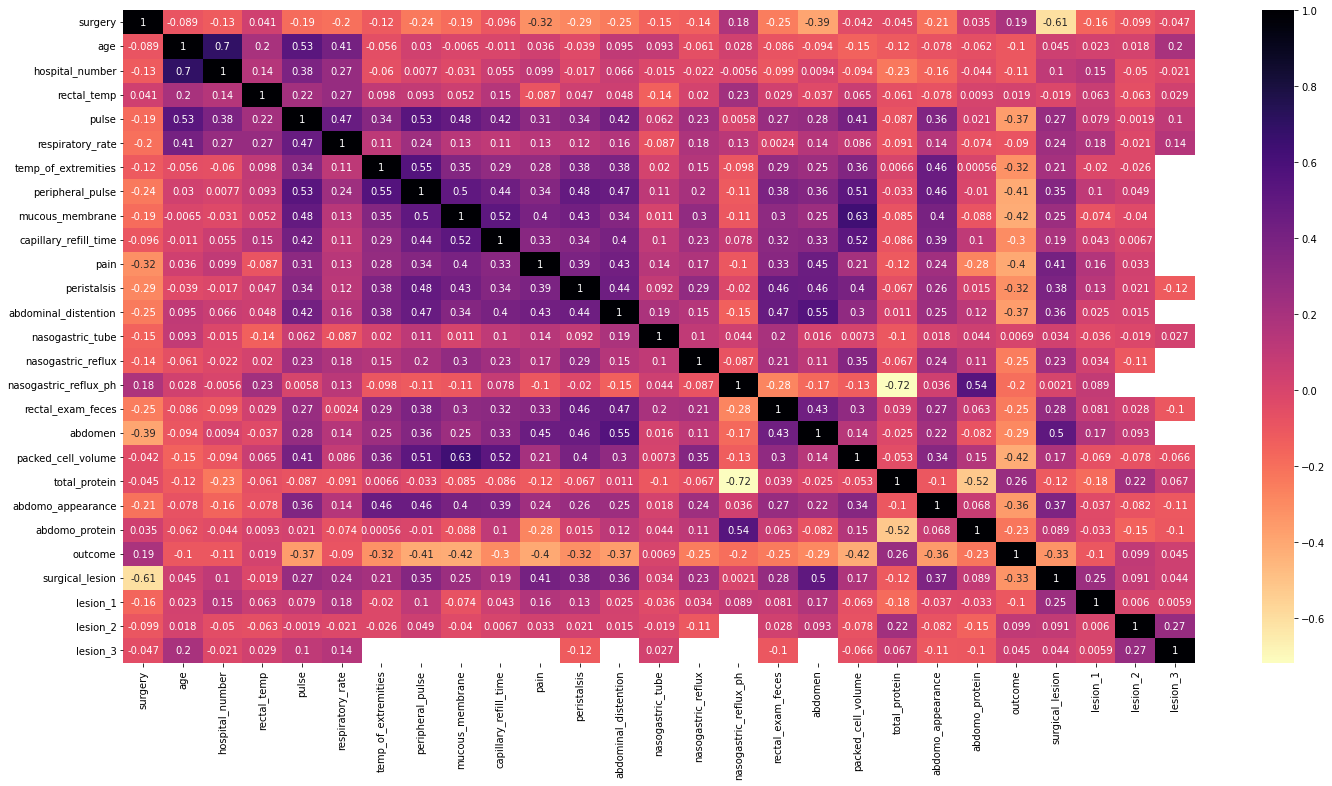

In [194]:
plt.figure(figsize=(24,12))
sb.heatmap(df.corr(),cmap='magma_r',annot=True)

Here we can see that 'nasogastric_reflux_ph', 'abdomo_protein', 'hospital_number' and 'cp_data' has very little corelation and 'rectal_exam_feces', 'abdomen' and 'abdomo_appearance' have too many missing values

Removing column containing too many missing values and low corelation.   

In [195]:
df.drop('nasogastric_reflux_ph', axis=1, inplace = True)
df.drop('abdomo_protein', axis=1, inplace = True)
df.drop('abdomo_appearance', axis=1, inplace = True)
df.drop('abdomen', axis=1, inplace = True)
df.drop('hospital_number', axis=1, inplace = True)
df.drop('cp_data', axis=1, inplace = True)
df.drop('rectal_exam_feces', axis=1, inplace = True)

In [196]:
df.isna().sum()

surgery                    0
age                        0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
packed_cell_volume        29
total_protein             33
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
dtype: int64

<AxesSubplot:>

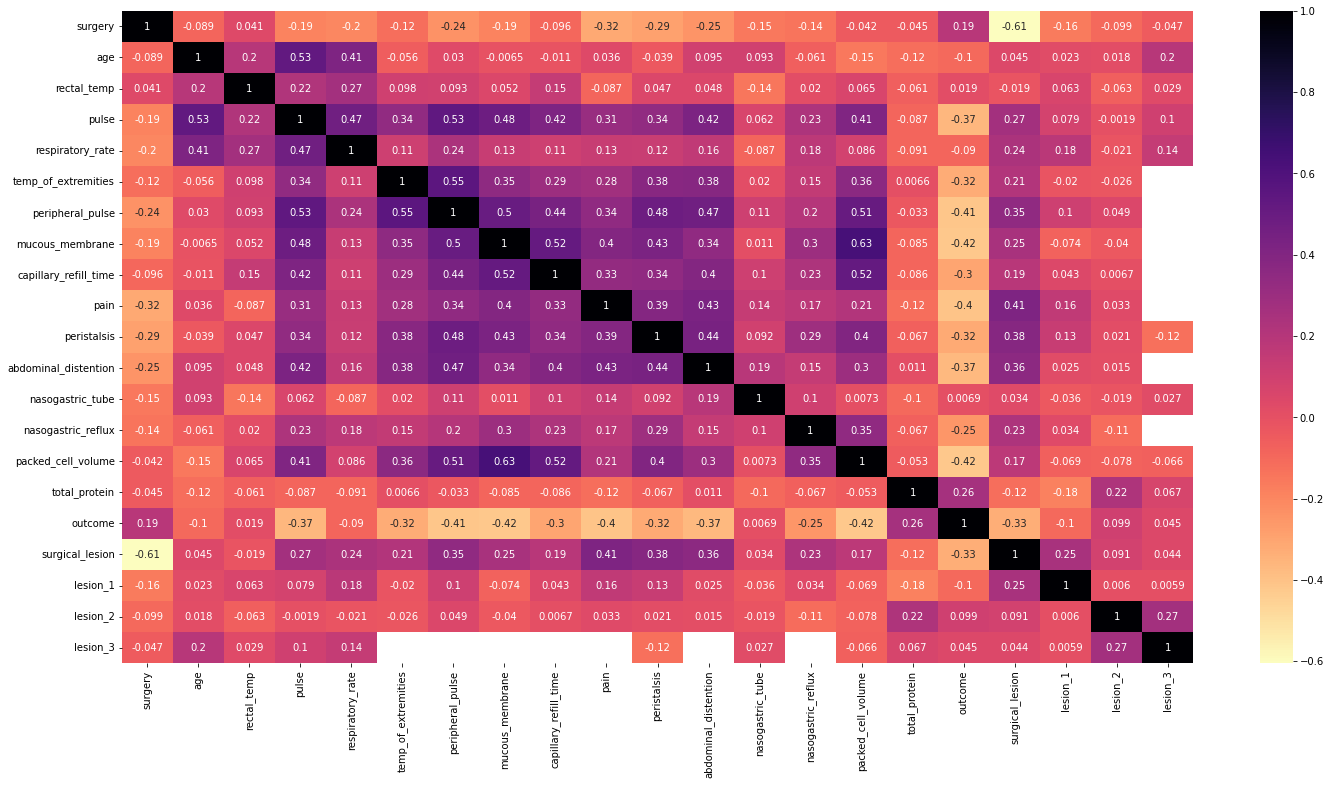

In [197]:
plt.figure(figsize=(24,12))
sb.heatmap(df.corr(),cmap='magma_r',annot=True)

In [198]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,abdominal_distention,nasogastric_tube,nasogastric_reflux,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3
0,2.0,1.0,38.5,66.0,28.0,3.0,3.0,NaN,3.0,5.0,...,4.0,NaN,NaN,45.0,8.4,0.0,0.0,11300,0,0
1,1.0,1.0,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,...,2.0,NaN,NaN,50.0,85.0,1.0,0.0,2208,0,0
2,2.0,1.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,...,1.0,NaN,NaN,33.0,6.7,2.0,0.0,0,0,0
3,1.0,2.0,39.1,164.0,84.0,4.0,1.0,6.0,3.0,2.0,...,4.0,1.0,2.0,48.0,7.2,0.0,1.0,2208,0,0
4,2.0,1.0,37.3,104.0,35.0,NaN,NaN,6.0,3.0,NaN,...,NaN,NaN,NaN,74.0,7.4,0.0,0.0,4300,0,0


<AxesSubplot:>

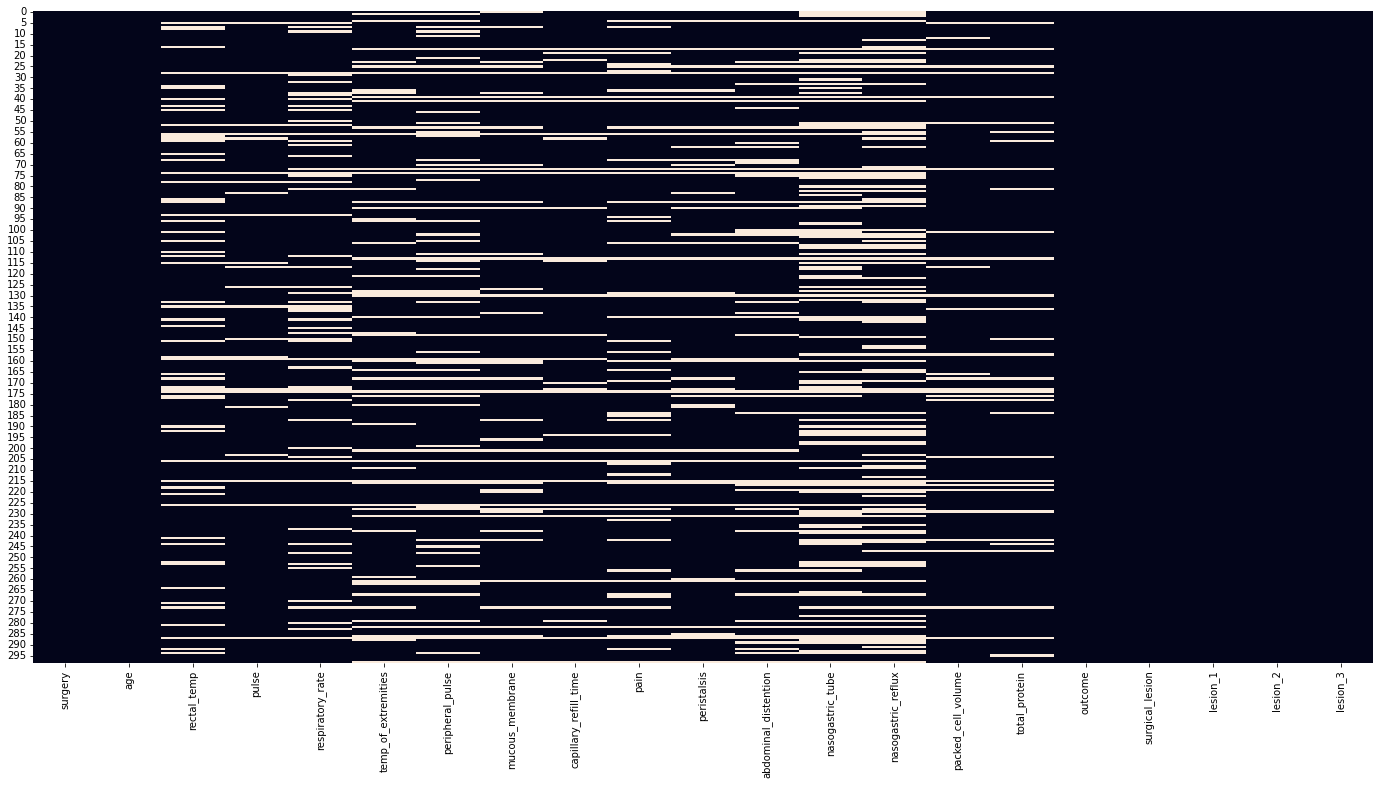

In [199]:
plt.figure(figsize=(24,12))
sb.heatmap(df.isnull(), cbar=False)

In [200]:
null = df.isnull().sum()
print(null)

surgery                    0
age                        0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
packed_cell_volume        29
total_protein             33
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
dtype: int64


In [201]:
for col in df.columns.values:
    if (len(df[col].value_counts())> 5) and (df[col].isnull().sum() > 0):
        print(col)

rectal_temp
pulse
respiratory_rate
mucous_membrane
packed_cell_volume
total_protein


In [202]:
df.head(299)

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,abdominal_distention,nasogastric_tube,nasogastric_reflux,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3
0,2.0,1.0,38.5,66.0,28.0,3.0,3.0,NaN,3.0,5.0,...,4.0,NaN,NaN,45.0,8.4,0.0,0.0,11300,0,0
1,1.0,1.0,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,...,2.0,NaN,NaN,50.0,85.0,1.0,0.0,2208,0,0
2,2.0,1.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,...,1.0,NaN,NaN,33.0,6.7,2.0,0.0,0,0,0
3,1.0,2.0,39.1,164.0,84.0,4.0,1.0,6.0,3.0,2.0,...,4.0,1.0,2.0,48.0,7.2,0.0,1.0,2208,0,0
4,2.0,1.0,37.3,104.0,35.0,NaN,NaN,6.0,3.0,NaN,...,NaN,NaN,NaN,74.0,7.4,0.0,0.0,4300,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,NaN,120.0,70.0,4.0,NaN,4.0,3.0,2.0,...,NaN,NaN,NaN,55.0,65.0,1.0,0.0,3205,0,0
295,2.0,1.0,37.2,72.0,24.0,3.0,2.0,4.0,3.0,4.0,...,3.0,3.0,0.0,44.0,NaN,1.0,1.0,2208,0,0
296,1.0,1.0,37.5,72.0,30.0,4.0,3.0,4.0,1.0,4.0,...,3.0,2.0,0.0,60.0,6.8,0.0,1.0,3205,0,0
297,1.0,1.0,36.5,100.0,24.0,3.0,3.0,3.0,1.0,3.0,...,3.0,3.0,0.0,50.0,6.0,2.0,1.0,2208,0,0


Filling Missing values

In [203]:
df['surgery'].fillna(df['surgery'].mode()[0], inplace = True)
df['rectal_temp'].fillna(df['rectal_temp'].mean(), inplace = True)
df['pulse'].fillna(df['pulse'].mean(), inplace = True)
df['respiratory_rate'].fillna(df['respiratory_rate'].mean(), inplace = True)
df['mucous_membrane'].fillna(df['mucous_membrane'].mean(), inplace = True)
df['packed_cell_volume'].fillna(df['packed_cell_volume'].mean(), inplace = True)
df['total_protein'].fillna(df['total_protein'].mean(), inplace = True)
df['pain'].fillna(random.choice(df['pain'][df['pain'].notna()]), inplace=True)


In [204]:
df.head(10)

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,abdominal_distention,nasogastric_tube,nasogastric_reflux,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3
0,2.0,1.0,38.500000,66.0,28.000000,3.0,3.0,2.853175,3.0,5.0,...,4.0,NaN,NaN,45.000000,8.400000,0.0,0.0,11300,0,0
1,1.0,1.0,39.200000,88.0,20.000000,NaN,NaN,4.000000,1.0,3.0,...,2.0,NaN,NaN,50.000000,85.000000,1.0,0.0,2208,0,0
2,2.0,1.0,38.300000,40.0,24.000000,1.0,1.0,3.000000,1.0,3.0,...,1.0,NaN,NaN,33.000000,6.700000,2.0,0.0,0,0,0
3,1.0,2.0,39.100000,164.0,84.000000,4.0,1.0,6.000000,3.0,2.0,...,4.0,1.0,2.0,48.000000,7.200000,0.0,1.0,2208,0,0
4,2.0,1.0,37.300000,104.0,35.000000,NaN,NaN,6.000000,3.0,4.0,...,NaN,NaN,NaN,74.000000,7.400000,0.0,0.0,4300,0,0
5,2.0,1.0,38.168619,72.0,30.460581,2.0,1.0,3.000000,1.0,2.0,...,2.0,2.0,0.0,46.307407,24.274436,2.0,0.0,0,0,0
6,1.0,1.0,37.900000,48.0,16.000000,1.0,1.0,1.000000,1.0,3.0,...,3.0,1.0,0.0,37.000000,7.000000,2.0,1.0,3124,0,0
7,1.0,1.0,38.168619,60.0,30.460581,3.0,NaN,2.853175,1.0,4.0,...,2.0,2.0,0.0,44.000000,8.300000,0.0,1.0,2208,0,0
8,2.0,1.0,38.168619,80.0,36.000000,3.0,4.0,3.000000,1.0,4.0,...,4.0,2.0,0.0,38.000000,6.200000,1.0,1.0,3205,0,0
9,2.0,2.0,38.300000,90.0,30.460581,1.0,NaN,1.000000,1.0,5.0,...,1.0,2.0,0.0,40.000000,6.200000,2.0,0.0,0,0,0


In [205]:
for col in df.columns.values:
    if (df[col].isnull().sum()>0):  
        if (df[col].dtype == 'float64'):
            df[col].fillna(df[col].mode()[0], inplace = True)

In [206]:
df.head(10)

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,abdominal_distention,nasogastric_tube,nasogastric_reflux,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3
0,2.0,1.0,38.500000,66.0,28.000000,3.0,3.0,2.853175,3.0,5.0,...,4.0,2.0,0.0,45.000000,8.400000,0.0,0.0,11300,0,0
1,1.0,1.0,39.200000,88.0,20.000000,3.0,1.0,4.000000,1.0,3.0,...,2.0,2.0,0.0,50.000000,85.000000,1.0,0.0,2208,0,0
2,2.0,1.0,38.300000,40.0,24.000000,1.0,1.0,3.000000,1.0,3.0,...,1.0,2.0,0.0,33.000000,6.700000,2.0,0.0,0,0,0
3,1.0,2.0,39.100000,164.0,84.000000,4.0,1.0,6.000000,3.0,2.0,...,4.0,1.0,2.0,48.000000,7.200000,0.0,1.0,2208,0,0
4,2.0,1.0,37.300000,104.0,35.000000,3.0,1.0,6.000000,3.0,4.0,...,1.0,2.0,0.0,74.000000,7.400000,0.0,0.0,4300,0,0
5,2.0,1.0,38.168619,72.0,30.460581,2.0,1.0,3.000000,1.0,2.0,...,2.0,2.0,0.0,46.307407,24.274436,2.0,0.0,0,0,0
6,1.0,1.0,37.900000,48.0,16.000000,1.0,1.0,1.000000,1.0,3.0,...,3.0,1.0,0.0,37.000000,7.000000,2.0,1.0,3124,0,0
7,1.0,1.0,38.168619,60.0,30.460581,3.0,1.0,2.853175,1.0,4.0,...,2.0,2.0,0.0,44.000000,8.300000,0.0,1.0,2208,0,0
8,2.0,1.0,38.168619,80.0,36.000000,3.0,4.0,3.000000,1.0,4.0,...,4.0,2.0,0.0,38.000000,6.200000,1.0,1.0,3205,0,0
9,2.0,2.0,38.300000,90.0,30.460581,1.0,1.0,1.000000,1.0,5.0,...,1.0,2.0,0.0,40.000000,6.200000,2.0,0.0,0,0,0


In [207]:
df.isna().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64

2.0    178
0.0     77
1.0     44
Name: outcome, dtype: int64


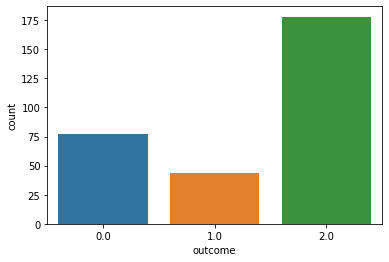

In [208]:
sb.countplot(data=df, x="outcome");
print(df.outcome.value_counts())

4.0    93
3.0    67
2.0    59
5.0    42
1.0    38
Name: pain, dtype: int64


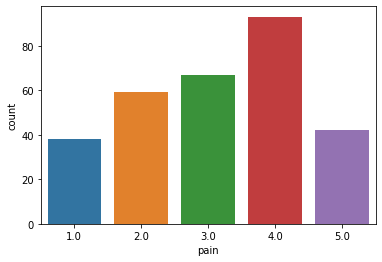

In [209]:
sb.countplot(data=df, x="pain");
print(df.pain.value_counts())

<AxesSubplot:xlabel='outcome', ylabel='count'>

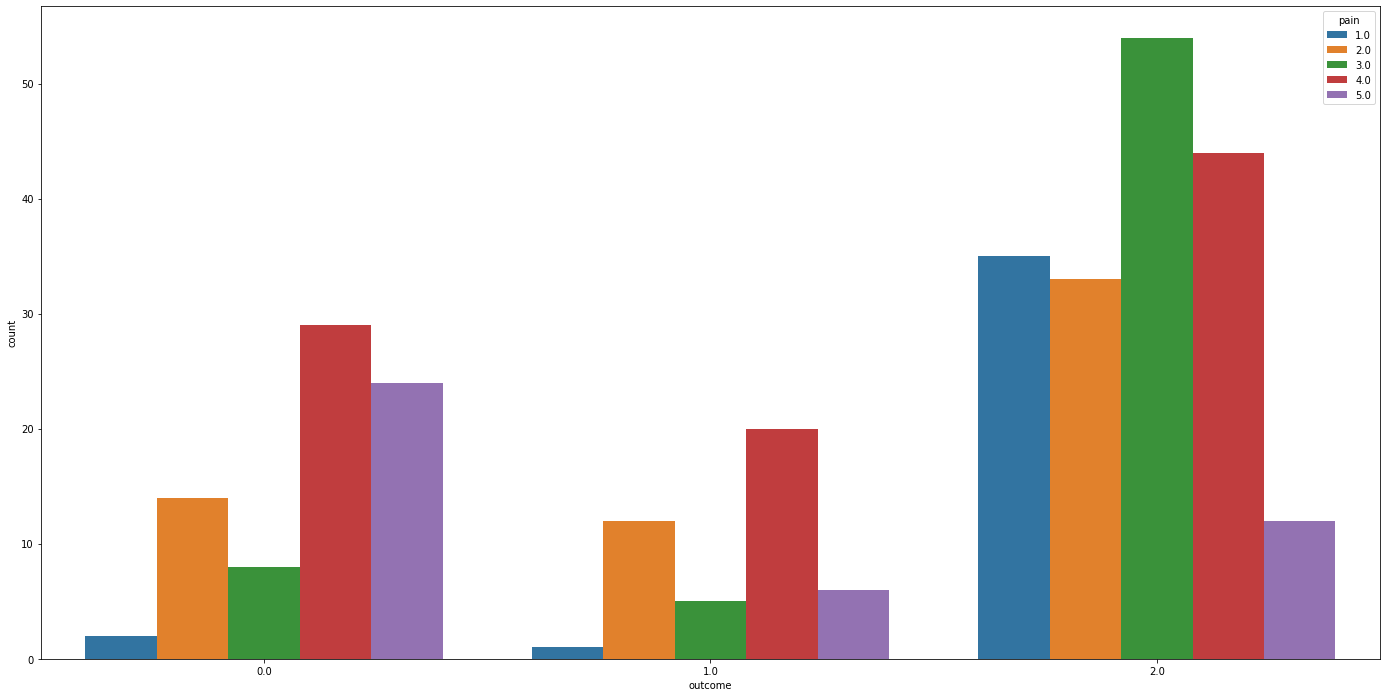

In [210]:
plt.figure(figsize=(24,12))
sb.countplot(data=df, x='outcome', hue = 'pain')

<AxesSubplot:xlabel='outcome', ylabel='count'>

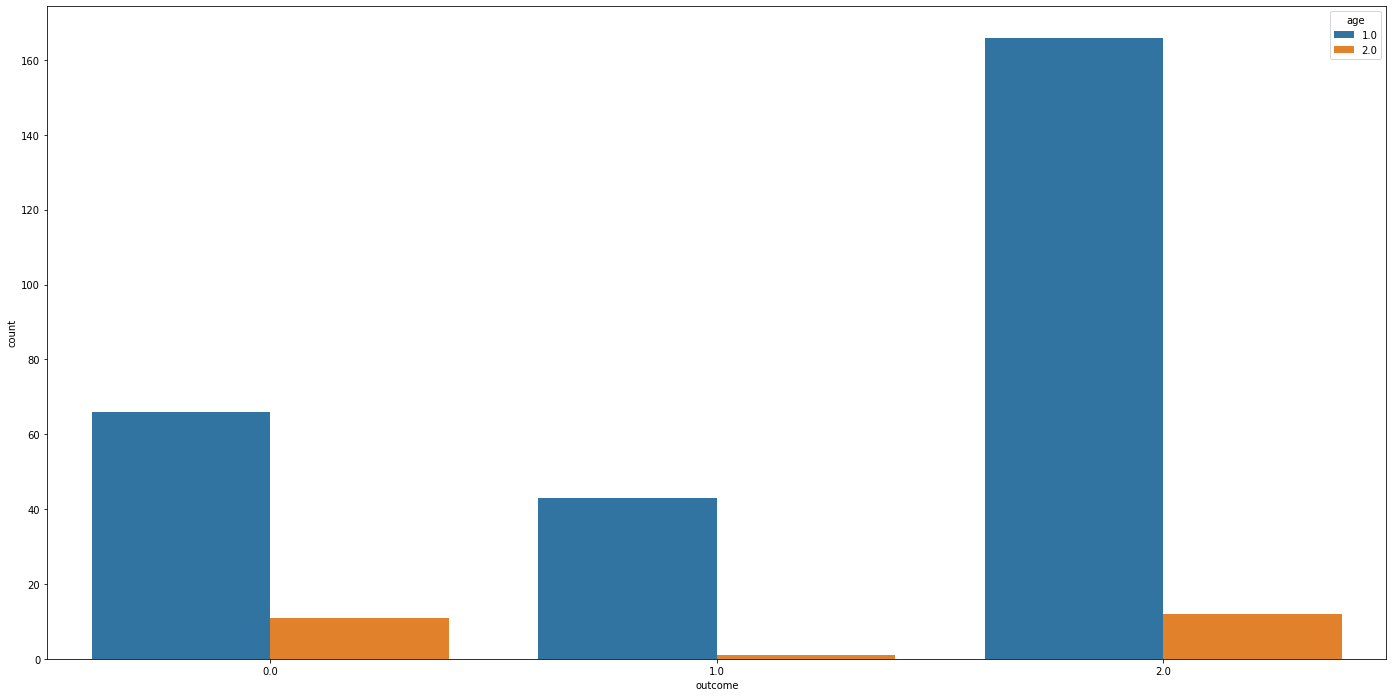

In [211]:
plt.figure(figsize=(24,12))
sb.countplot(data=df, x='outcome', hue = 'age')

In [212]:
dfTrain,dfTest = train_test_split(df, test_size=0.3, random_state=0)


In [213]:
dfTest.isna().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64

In [214]:
dfTrain.isna().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64

In [215]:
X = df.drop('outcome', axis = 1)
Y = df['outcome']

In [216]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

In [217]:
Y_test.info

<bound method Series.info of 210    0.0
217    1.0
28     0.0
117    1.0
131    0.0
293    2.0
72     0.0
238    1.0
61     2.0
98     2.0
197    2.0
109    0.0
163    2.0
250    0.0
242    2.0
275    1.0
247    2.0
177    2.0
277    2.0
189    2.0
215    2.0
93     0.0
287    2.0
62     0.0
89     2.0
240    2.0
261    2.0
245    2.0
170    0.0
47     2.0
53     2.0
156    1.0
107    2.0
90     2.0
20     2.0
83     0.0
267    2.0
7      0.0
110    0.0
16     0.0
164    1.0
166    2.0
236    2.0
32     2.0
148    2.0
104    0.0
34     2.0
92     2.0
200    0.0
63     1.0
102    2.0
294    1.0
29     2.0
129    2.0
160    0.0
0      0.0
221    2.0
24     2.0
270    2.0
122    2.0
Name: outcome, dtype: float64>

In [218]:
sc = StandardScaler()

In [219]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [220]:
LR = LogisticRegression().fit(X_train,Y_train)

logistic regression accuracy score:  63.33333333333333


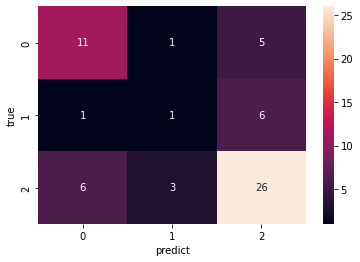

In [221]:
pred_LR = LR.predict(X_test)
cm2 = confusion_matrix(Y_test,pred_LR)
ax2 = sb.heatmap(cm2,annot=True)
ax2.set(xlabel='predict', ylabel='true')
pred2 = accuracy_score(Y_test,pred_LR)
print("logistic regression accuracy score: ",pred2*100)

In [222]:
mcr = 1 - pred2 # Misclassification Rate = 1-Accuracy
print(mcr)

0.3666666666666667


In [223]:
print (classification_report(Y_test,pred_LR))

              precision    recall  f1-score   support

         0.0       0.61      0.65      0.63        17
         1.0       0.20      0.12      0.15         8
         2.0       0.70      0.74      0.72        35

    accuracy                           0.63        60
   macro avg       0.50      0.50      0.50        60
weighted avg       0.61      0.63      0.62        60

